# **Herramientas de Análisis**

---
---

<!-- script html for image -->

<center>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Sw-ep1-logo.svg/1280px-Sw-ep1-logo.svg.png"  width="500" height="150"/>


<br>

Fuente de la imagen: [https://es.wikipedia.org](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_I_-_La_amenaza_fantasma)

</center>

<br>

# **Índice**

---
---

> [Herramientas de Análisis](#scrollTo=tW3jK_BDgjno&line=20&uniqifier=1)
<br>
>>
>> [Preparación del Entorno](#scrollTo=5zZfGqOugjnr&line=3&uniqifier=1) \\
>>   \\
>> [Ejercicio 2](#scrollTo=EljLebnxgjqM) \\

# Preparación del entorno

Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.

In [308]:
if "google.colab" in str(get_ipython()):
    !git clone https://github.com/griu/mbdds_fc20.git /content/mbdds_fc20
    !git -C /content/mbdds_fc20 pull
    %cd /content/mbdds_fc20/Python
    !python -m pip install -r requirementsColab.txt

# Ejercicio 2

Para el ejercicio 2, añadimos los datos del ejercicio 1 los datos de planetas.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # para el estilo de graficos

entidades = ["planets","starships","vehicles","people","species"]
entidades_df = {x: pd.read_pickle("www/" + x + "_df.pkl") for x in entidades}

# Datos people
people_df = entidades_df["people"][["height","mass","birth_year","gender","homeworld"]].dropna()

# planetas
planets_df = entidades_df["planets"][["orbital_period","url"]].dropna()
planets_df.head()

,orbital_period,url
name,,
Tatooine,304.0,https://swapi.dev/api/planets/1/
Alderaan,364.0,https://swapi.dev/api/planets/2/
Yavin IV,4818.0,https://swapi.dev/api/planets/3/
Hoth,549.0,https://swapi.dev/api/planets/4/
Dagobah,341.0,https://swapi.dev/api/planets/5/


## Ejercicio 2.1.

Construye una función que diga "buenos días", "buenas tardes" o "buenas noches" en función de la hora del día.

> Truco 1: Para testear la función haz que tenga un parametro de entrada que tenga como valor por defecto: `datetime.now()` (primero carga `from datetime import datetime`).

> Truco 2: Puedes extraer la hora de un datetime con `.hour`.

In [12]:
from datetime import datetime

def saludar(fecha = datetime.now()):
    """devuelve etapa del dia según la hora"""

    hora = fecha.hour

    if hora >= 6 and hora < 12:
        print("buenos días")
    elif hora >= 12 and hora < 18:
        print("buenas tardes")
    else:
        print("buenas noches")

saludar()

buenas tardes


## Ejercicio 2.2.

En el data frame personajes_df, calcula de nuevo el IMC y crea una nueva variable con el trameado de la variable IMC definido en la siguiente tabla:

 | Categoría de nivel de peso | Intervalo del percentil |
 | -------------------------- | ----------------------- | 
 | Bajo peso | < 18.5 |
 | Normal | >= 18.5 y < 25 |
 | Sobrepeso | >= 25 y <30 |
 | Obeso | >= 30 |

> Truco: utiliza `pd.cut(..., right=False)` y modifica las etiquetas con `.cat.rename_categories`.  

In [16]:

personajes_df = people_df.copy()
personajes_df.rename(columns={"height": "altura", "mass": "peso", "birth_year": "edad", "gender": "genero", "homeworld": "planeta"}, inplace = True)
personajes_df["imc"] = personajes_df["peso"]/((personajes_df["altura"]/100)**2)

personajes_df.head(10)

bins = pd.IntervalIndex.from_tuples([(-np.inf, 18.5), (18.5, 25), (25, 30), (30, np.inf)])
lbls = ["Bajo peso", "Normal", "Sobrepeso", "Obeso"]

personajes_df["imc_disc"] = pd.cut(personajes_df["imc"], bins, right=False).cat.rename_categories(lbls)

personajes_df[["imc","imc_disc"]].head(10)

,imc,imc_disc
name,,
Luke Skywalker,26.027582,Sobrepeso
C-3PO,26.892323,Sobrepeso
R2-D2,34.722222,Obeso
Darth Vader,33.330066,Obeso
Leia Organa,21.777778,Normal
Owen Lars,37.874006,Obeso
Beru Whitesun lars,27.548209,Sobrepeso
Biggs Darklighter,25.082863,Sobrepeso
Obi-Wan Kenobi,23.245985,Normal


## Ejercicio 2.3.

Muestra las frecuencias de la nueva variable definida en 2.2.

In [312]:
personajes_df["imc_disc"].value_counts().sort_index()

Bajo peso     4
Normal       14
Sobrepeso    11
Obeso         7
Name: imc_disc, dtype: int64

## Ejercicio 2.4.

Calcula ahora un trameado de la edad en 5 grupos equiprobables.

Muestra los recuentos (frecuencias) de la nueva obtenida por pantalla.

> Truco: Busca ayuda de la función [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)

In [313]:
personajes_df["edad_disc"] = pd.qcut(personajes_df["edad"], 5)
personajes_df["edad_disc"].value_counts().sort_index()

(7.999, 29.0]    8
(29.0, 41.9]     8
(41.9, 52.0]     6
(52.0, 82.0]     7
(82.0, 896.0]    7
Name: edad_disc, dtype: int64

## Ejercicio 2.5.

Presenta la tabla cruzada de tramos de edad (ej. 2.4) por tramos de IMC (ej. 2.2). 

¿Qué tramo de edad tiene un mayor número de personajes con Bajo peso?

In [314]:
pd.crosstab(personajes_df["edad_disc"], personajes_df["imc_disc"])

imc_disc,Bajo peso,Normal,Sobrepeso,Obeso
edad_disc,,,,
"(7.999, 29.0]",0,3,4,1
"(29.0, 41.9]",1,2,3,2
"(41.9, 52.0]",3,1,1,1
"(52.0, 82.0]",0,4,2,1
"(82.0, 896.0]",0,4,1,2


### Respuesta
Según los resultados obtenidos podemos determinar que el rango que va entre **41.9 y 52.0 años** es el que mayor conteo de personajes con `Bajo peso`, con un total de **3 individuos**.

## Ejercicio 2.6.

Calcula una tabla resumen (data frame) donde se presente la media del IMC en cada tramo de edad calculado en ejercicio 2.4.

Presenta por pantalla la nueva tabla resumen.


In [315]:
imc_medio_tramo = personajes_df.groupby("edad_disc")["imc"].agg(["mean"])
imc_medio_tramo = imc_medio_tramo.dropna()
imc_medio_tramo

,mean
edad_disc,
"(7.999, 29.0]",25.960538
"(29.0, 41.9]",26.242997
"(41.9, 52.0]",22.972490
"(52.0, 82.0]",24.774935
"(82.0, 896.0]",85.311313


## Ejercicio 2.7.

Presenta los datos del ej. 2.6. como un gráfico de líneas donde el eje x sea la edad y el eje y el IMC medio.

> Truco: Como eje x del gráfico de líneas, puedes calcular en 2.6., en el mismo cálculo del IMC medio, la mediana de edad de cada tramo de edad.

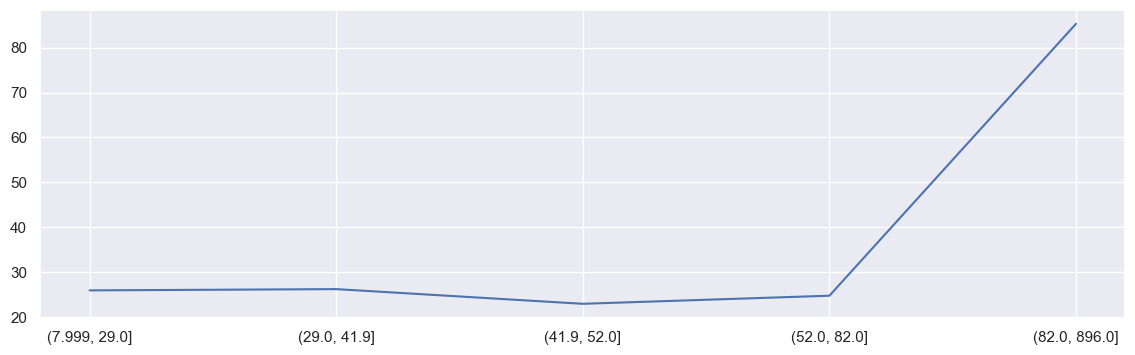

In [316]:
imc_medio_tramo_idx = imc_medio_tramo.reset_index()
plt.plot(imc_medio_tramo_idx["edad_disc"].astype(str), imc_medio_tramo_idx["mean"])

## Ejercicio 2.8.

Calcula el ratio del IMC sobre la mediana del IMC de su tramo de edad (definidos en el ejercicio 2.2.) mediante la función groupby(...).apply(...).

> truco: primero crea una función que devuelva:  `x / np.nanmedian(x)`.

Presenta los datos mediante un boxplot de la nueva variable: [pd.boxplot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html). 

In [317]:
def calcular_ratio(x):
    x["imc_mediana_tramo"] = np.nanmedian(x['imc'])
    x["ratio_imc"] = x["imc"]/  np.nanmedian(x['imc'])
    return x

ratio_df = personajes_df.groupby(["edad_disc"], group_keys=False).apply(calcular_ratio)

ratio_df[["edad_disc", "imc", "imc_mediana_tramo", "ratio_imc"]].head(10)


,edad_disc,imc,imc_mediana_tramo,ratio_imc
name,,,,
Luke Skywalker,"(7.999, 29.0]",26.027582,25.454655,1.022508
C-3PO,"(82.0, 896.0]",26.892323,23.893259,1.125519
R2-D2,"(29.0, 41.9]",34.722222,25.416769,1.366115
Darth Vader,"(29.0, 41.9]",33.330066,25.416769,1.311342
Leia Organa,"(7.999, 29.0]",21.777778,25.454655,0.855552
Owen Lars,"(41.9, 52.0]",37.874006,21.042051,1.799920
Beru Whitesun lars,"(41.9, 52.0]",27.548209,21.042051,1.309198
Biggs Darklighter,"(7.999, 29.0]",25.082863,25.454655,0.985394
Obi-Wan Kenobi,"(52.0, 82.0]",23.245985,23.766410,0.978102


Text(0.5, 1.0, '')

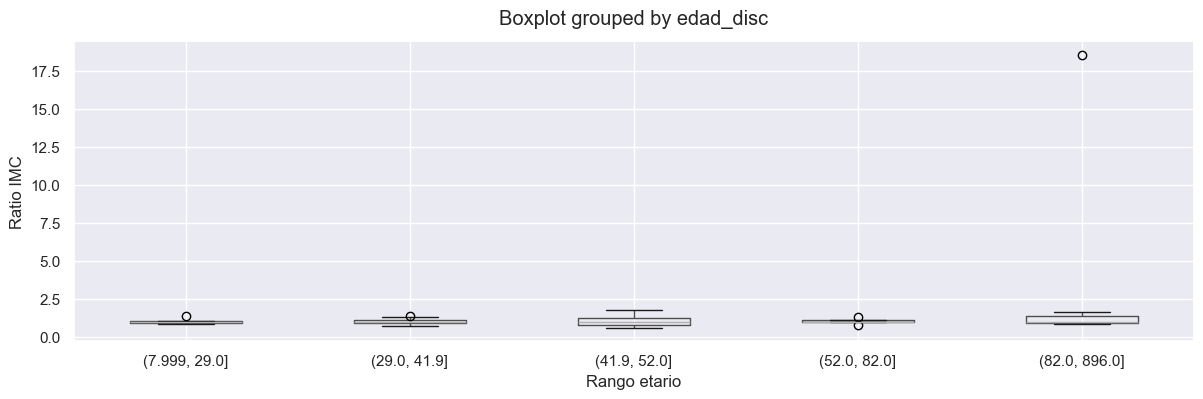

In [318]:
# sns.set(rc={'figure.figsize':(14,4)})
# sns.boxplot(x='edad_disc', y='ratio_imc', data=ratio_df)

bp = ratio_df.boxplot(column='ratio_imc', by="edad_disc")
bp.set_xlabel("Rango etario")
bp.set_ylabel('Ratio IMC')

bp.set_title("")

### Consideración personal
Se puede ver un valor extremo (outlier) en el rango etario **(82, 896]**, el cual afecta la visualización y apreciación de nuestros datos. Intentaré mejorar esta condición, sanitizando nuestro dataset, al quedarnos con el quantil 0.99, mejorando el detalle sobre nuestra muestra.

Text(0.5, 1.0, '')

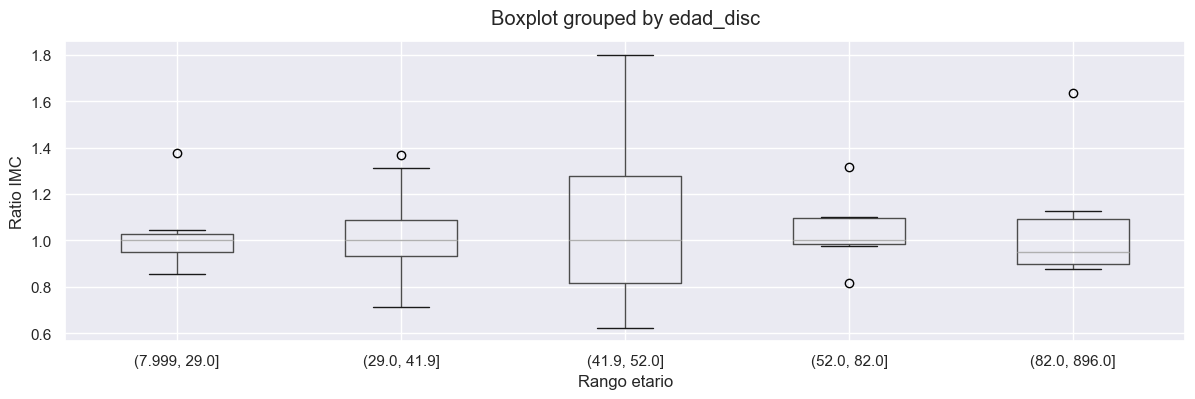

In [319]:
q = ratio_df["ratio_imc"].quantile(0.99)
ratio_df_clean = ratio_df[ratio_df["ratio_imc"] < q]

bp = ratio_df_clean.boxplot(column='ratio_imc', by="edad_disc")
bp.set_xlabel("Rango etario")
bp.set_ylabel('Ratio IMC')

bp.set_title("")

## Ejercicio 2.9.

¿Cual es el nombre de planeta con un menor índice IMC medio de sus personajes?
¿Que personaje/s son de ese planeta?

In [320]:
# Obtenemos la media de los planetas y nos quedamos con el menor
planeta_imc_menor = personajes_df.groupby("planeta")["imc"].agg(["mean"]).sort_values(by="mean").head(1)
planeta_imc_menor = planeta_imc_menor.reset_index()

# Obtenemos los datos del planeta
# Hacemos una copia del dataframe para poder resetear indices en cada 'Run' de la celda
planets_aux_df = planets_df.reset_index()

inner = pd.merge(planets_aux_df, planeta_imc_menor, left_on=["url"], right_on=["planeta"])

inner[["name", "mean"]]


,name,mean
0,Ryloth,17.358919


In [321]:
# Obtenemos los personajes del planeta
# Hacemos una copia del dataframe para poder resetear indices en cada 'Run' de la celda
personajes_aux_df = personajes_df.reset_index()

personajes_planeta = pd.merge(inner, personajes_aux_df, left_on=["url"], right_on=["planeta"])

personajes_planeta[["name_y", "imc"]].head()

,name_y,imc
0,Ayla Secura,17.358919


### Respuesta
El planeta con menor indice IMC medio es **Ryloth** con una media de **17.358919**. El planeta tiene un único personaje asociado y es **Ayla Secura**, cuyo IMC es justamente identico a la media de su planeta.

## Ejercicio 2.10.

Convierte a datetime los siguientes strings con la función [datetime.strptime()](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) (consulta la ayuda si es necesario) de la libreria datetime:

- "1 january, 2020"
- "15-feb.-2017"
- "20190701 22:30"  # 1 de julio de 2019



In [322]:
from datetime import datetime

fecha1 = datetime.strptime("1 january, 2020", '%d %B, %Y')
print(fecha1)

fecha2 = datetime.strptime("15-feb.-2017", '%d-%b.-%Y')
print(fecha2)

fecha3 = datetime.strptime("20190701 22:30", '%Y%m%d %H:%M')
print(fecha3)

2020-01-01 00:00:00
2017-02-15 00:00:00
2019-07-01 22:30:00
